# Data Set Description

## The business problem of the below dataset is to classify whether a woman needs to undergo a caesarean section delivery or not.

## Based on various factors such as age, delivery no(Delivey No), delivery time(Delivery No), blood pressure(Blood of Pressure), Heart problem.

## This problem is important in the medical field  as it can help doctors and medical professionals make informed decisions about the delivery method for pregnant women. 

## It can also help in reducing the number of unnecessary caesarean operations, which can have potential risks for both the mother and the child.

## The dataset contains 80 instances with 6 input variables (delivery no(Delivey No), delivery time(Delivery No), blood pressure(Blood of Pressure) and Heart problem and 1 binary output variable (caesarian delivery). The outcome is to build a ML model which can  predict whether a woman needs to undergo a caesarean  delivery or not based on the input variables.

# Import the Libraries

In [1]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import summarytools
from summarytools import dfSummary
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
np.random.seed(1)

# Data Load

In [2]:
df_Caesarian=pd.read_csv("C:/Users/mssur/Downloads/Caesarian Section Classification Dataset.csv")

# Analysis of the dataset

In [3]:
# generate a basic summary of the data
df_Caesarian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


# Checking the data by viewing the first few rows

In [4]:
df_Caesarian.head() # note that we don't want to dump all the data to the screen

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


In [5]:
# generate a statistical summary of the numeric value in the data
df_Caesarian.describe()

,Age,Delivey No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


In [6]:
# Another way of displaying summary statistics for our data is through summary tools:
dfSummary(df_Caesarian)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 27.7 (5.0)min < med < max:17.0 < 27.0 < 40.0IQR (CV) : 7.0 (5.5),22 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmklEQVR4nO3dvY7aQBRA4Tv2gsyPbCEU6GhSRkrhkofIw+YRUvAEFGm2okNClhHOWhjjNNlIUWAXPHjtOzpfP+DiaIU9dz2mqioBus5r+wKAWzy1fQFNMcYMRKRv8RHHqqpeHnU9sONkqMaYwXQ6/RaG4aTuZ+z3+8QY851Yu8HJUEWkH4bhZLlcvkRRlN+7OE3TYLVaTXa7XV9ECLUDXA1VRESiKMpns9mvmssHD70YWOFmCioQKlQgVKhAqFCBUKECoUIFQoUKTj9H1Yit38sItUPY+r2OULuFrd8rCLWD2Pr9HzdTUIFQoQKhQgVChQqEChUIFSrweOqKsix7IhIaY+osd3J3qE2EekGWZb2iKL4uFgvf9/27H7y7ujvUJkK94Hg8PgVBMIzjOJ/P58k9a13eHWoTob5hNBrV3SFycneoTdxMQQVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKbKE2wGLyKjyfz70GLkk9Qn0wm8mroiiCsiy/5Hn+Q0Tq/heqkwj1wWwmrzabzWS9Xg9Pp5Pf1PVpRagNqTN5lSQJU1dXcDMFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSq8u4VqeUqHJyLnmmtt1jOF5Jg3Q7U5paMsy16WZZ/H4/Gz53nFR65nCsk97/1FrX1Kx59JoE9xHP+8d4rIdj1TSO65aXqqzikdr5NAdd/fZLOeKST3MOaHv7p8aiChQkS6f2ogoeJVp08NJFT8o6unBvLAHyoQKlQgVKjAb1THtPnyiyaPPCJUh7T58oumjzwiVIe0+fKLpo88IlQHtbnt3NSRR9xMQQVChQqEChVu+o2apmlw7wcfDodARCTLsmC73Q4/cr3W79Z63bbrb+nrN7YFoNEFd/J1AAAAAElFTkSuQmCC"">",0(0.0%)
2,Delivey No[int64],Mean (sd) : 1.7 (0.8)min < med < max:1.0 < 1.0 < 4.0IQR (CV) : 1.0 (2.1),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAByElEQVR4nO3cQW7aQBiG4X8qhJKNLYTEYThED9tDcBtUwaKJKoG7abtJE8Cmij/0PGs8zOIVkZX5pw3DUDB3Xz57A3CNxaUPtNaeq2o5cv2fwzC8jHwW/vow1Nba83q9/tp13WrM4sfj8Xtr7ZtYmerSL+qy67rVdrt96fv+9ZaFD4fD0263W+33+2VVCZVJLv7pr6rq+/51s9n8GLH+84hn4A0vU0QQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhKtmphJNHPOuMuo9Kw8Z6tQx7yqj3nPzkKHWhDHvKqPec/SooVbVpDHvKqPes+JlighCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCI89AUUidyZ9W9CnRF3Zr1PqPPizqx3CHWG3Jn1lpcpIgiVCEIlglCJIFQiCJUIQiWCUIkgVCL4zxR3M/FAzYeHaYTKXUw9UHPpMI1QuZfRB2quOUxzVaiHw+Hpli/+88zpdFpUVddau/Xxqbrz+bwYs++qT9176r6rfu/9fy3+C+gzl2mqnti+AAAAAElFTkSuQmCC"">",0(0.0%)
3,Delivery No[object],1. Timely2. Premature3. Latecomer,46 (57.5%)17 (21.2%)17 (21.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABfElEQVR4nO3bwWnjUBSF4atgwmQjYQwuxkWk2BShbozxWyQhG81iFlNBzhN631fBxfy2kfGZtm0rSHjpfQDjmKrqrapeex9ycD/btn31PqK30+VyeZ/n+dz7kCNrrT2mafoYPbjTPM/n2+32tSzLd+9jjuj5fP5Z1/V8v99fq2rs2KqqlmX5vl6vn72PObC33gfsgQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMScqv7956r3IUfltf3v1Fp7rOt6Lv+5+jWttUdV/fS+ozcbhAwbhKqaTPlI2csnm3f+AHaxrrI+GkP3dZX10Tj2sq7yJDwAP+oSIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI6b7usr6aBy7WFdZH43BBoEY6ypiPCAQ42uUGFM+Ykz5iDHlI8YDAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiTPmIMeUjxgaBGFM+Yv4CSryjSnt2ewYAAAAASUVORK5CYII="">",0(0.0%)
4,Blood of Pressure[object],1. Normal2. High3. Low4. low,40 (50.0%)20 (25.0%)19 (23.8%)1 (1.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACDklEQVR4nO3bzY3aYBSF4QtCk7CxhZAogwIoIsWmCAqgD4TwIkxmQxYZRVnOTzj+7DxPBVejV2aMOIv7/V6QsBz7AP4fYiNmUVXrqnoa+5AJernf77exj5iS1Xa7/dZ13WbsQ6ZmGIbLYrH4Lri3W3VdtzkcDre+75/HPmYqrtfr1+PxuDmfz09VJbY3WlVV9X3/vNvtfox9zMSsxz5garwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxq6rfP5kZ+5Ap8ff6mNUwDJfj8bgpP5l5l2EYLlX1MvYdU+Jn4R/nZ+HvtDDlI8ULAjGtf4z6qJqRptdVFkzz0uy6yoJpflpfV/k6Zka8IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjptkpX4s38TlNT/nM5ebFBoEYUz5iWn2yeaLNUJPrKquqeWpuXWVVNV+trquaezPm83ypS4zYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Y5tZVLd3Cv9Xkusqqap5sEIixriLm7yebpwkP9WddZdHEoy27rtvs9/t6nfO1

# Since in our dataset we have some case senstive values such as 'Low','low' and 'Yes','yes' 
# So now converting them as 'Low','Low' and 'Yes','Yes

In [7]:
df_Caesarian['Blood of Pressure'] = df_Caesarian['Blood of Pressure'].replace('low','Low')
df_Caesarian['Caesarian'] = df_Caesarian['Caesarian'].replace('yes','Yes')

In [8]:
# Check the missing values by summing the total na's for each variable
df_Caesarian.isna().sum()

Age                  0
Delivey No           0
Delivery No          0
Blood of Pressure    0
Heart Problem        0
Caesarian            0
dtype: int64

In [9]:
df_Caesarian.shape

(80, 6)

# Checking the data imbalance

Text(0.5, 1.0, 'Caesarian')

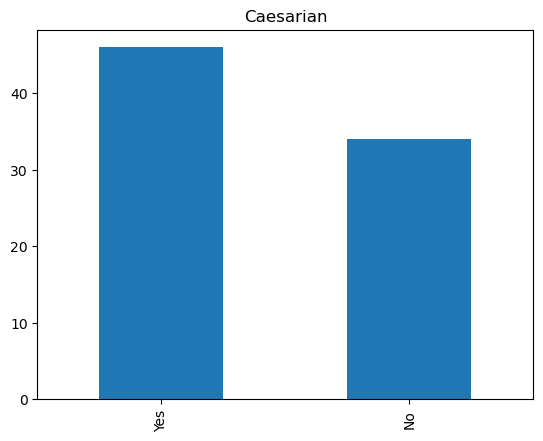

In [10]:
df_Caesarian['Caesarian'].value_counts().plot(kind='bar').set_title('Caesarian')

# Addressing the Data Imbalance by under sampling

In [11]:
! pip install imblearn

In [12]:
Y_label = 'Caesarian' # Target variable
X_label = list(df_Caesarian.columns) # Input variables
X_label.remove(Y_label)
# using randomunder sampling for handling data imbalance.
import imblearn
from imblearn.over_sampling import RandomOverSampler
data=df_Caesarian
rand_samp = RandomOverSampler()
ind_X, dep_Y = rand_samp.fit_resample(df_Caesarian[X_label],df_Caesarian[Y_label])
df_Caesarian=pd.concat([ind_X,dep_Y],axis=1,join="inner")
df_Caesarian

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes
...,...,...,...,...,...,...
87,25,1,Timely,Low,apt,No
88,26,2,Premature,Normal,apt,No
89,25,1,Premature,High,apt,No
90,23,1,Premature,Normal,apt,No


Text(0.5, 1.0, 'Caesarian')

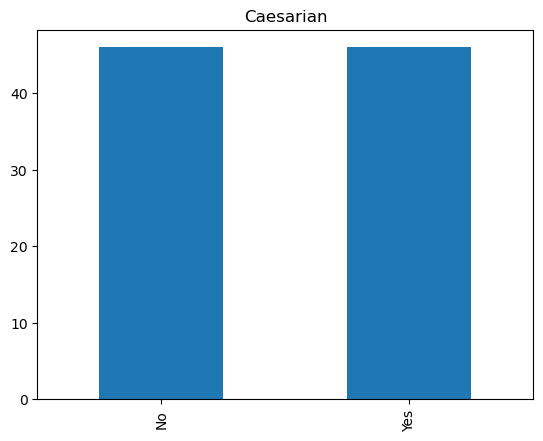

In [13]:
df_Caesarian['Caesarian'].value_counts().plot(kind='bar').set_title('Caesarian')

# Encoding using One-Hot encoding

In [14]:
df_dummy = pd.get_dummies(df_Caesarian,drop_first=True)
df_dummy.head()

,Age,Delivey No,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,1,0,1,0,0,0,0
1,26,2,0,1,0,1,0,1
2,26,2,1,0,0,1,0,0
3,28,1,0,1,0,0,0,0
4,22,2,0,1,0,1,0,1


# Separating the independent and dependent variables

In [15]:
#Separting df_train in independent and dependent variable
X=df_dummy.drop(['Caesarian_Yes'],axis=1)
y=df_dummy['Caesarian_Yes']

# Splitting into train data and test data

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Loading the preprocessed data into the CSV files

In [17]:
X_train.to_csv('df_Caesarian_train_X.csv', index=False)
y_train.to_csv('df_Caesarian_train_y.csv', index=False)
X_test.to_csv('df_Caesarian_test_X.csv', index=False)
y_test.to_csv('df_Caesarian_test_y.csv', index=False)

# Summary

## Firstly, I have loaded the dataset and observed the datatype of each column, and checked for the missing values
## In my dataset there are no missing values but there are categorical variables i.e. Delivey No, Delivery No, Blood of Pressure, Heart Problem
## I encoded the above categorical variables by using the one-hot encoding technique
## I split the data into the training and testing data and loaded the processed data into the new files

## Note: In my dataset, there are no continuous variables so standardization is not required in my dataset, there was a data imbalance and I addressed it
